> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Data quality checks: data types, missing values, duplicates and outliers
- Descriptive statistics
- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab uses the same dataset from **Lab 4**. Data on Bay Area Craigslist rental housing posts.

Source: Pennington, Kate (2018). Bay Area Craigslist Rental Housing Posts, 2000-2018. Retrieved from https://github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Import libraries, and the Data, and preview the Data

### Instructions:
- Import the `pandas` library.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `df.shape`, `df.info()` and `df.head()` to inspect the structure and preview the data.

In [22]:
# import any libraries that you wish to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)



In [21]:
df.shape

(60726, 17)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63576 entries, 3 to 200794
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   post_id      63576 non-null  object        
 1   date         63576 non-null  datetime64[ns]
 2   year         63576 non-null  int64         
 3   nhood        63576 non-null  category      
 4   city         63576 non-null  category      
 5   county       63066 non-null  category      
 6   price        63576 non-null  int64         
 7   beds         62215 non-null  float64       
 8   baths        14389 non-null  float64       
 9   sqft         63576 non-null  float64       
 10  room_in_apt  63576 non-null  int64         
 11  address      2607 non-null   object        
 12  lat          4925 non-null   float64       
 13  lon          2876 non-null   float64       
 14  title        61773 non-null  object        
 15  descr        2251 non-null   object        
 16  details 

In [ ]:

df.head()

## Part 2: Data quality checks -Inspect and Fix issues

### Instructions:
- Check data types (e.g., dates, numeric columns, strings) and fix problems
- Identify duplicates
- Check for outliers in key numeric variables like the target `price`, and others such as `sqft`, `beds`, or `baths`.
- Identify missing values.




### 🔧 Try It Yourself – Part 2.1: Check data types

- Use a command to view the data types
- convert `nhood`, `city` and `county` to categorical type
- convert `date` to datetime type

In [23]:
# write your code here to view datatypes
print(df.dtypes)

# convert strings nhood, city and county to category
df['nhood'] = df['nhood'].astype('category')
df['city'] = df['city'].astype('category')
df['county'] = df['county'].astype('category')

# convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')

post_id         object
date             int64
year             int64
nhood           object
city            object
county          object
price            int64
beds           float64
baths          float64
sqft           float64
room_in_apt      int64
address         object
lat            float64
lon            float64
title           object
descr           object
details         object
dtype: object


### 🔧 Try It Yourself – Part 2.2: Check duplicates

In [ ]:
# write your code here to count exact duplicates


In [24]:
# write your code here to count exact duplicates
print("Number of exact duplicate rows:", df.duplicated().sum())

Number of exact duplicate rows: 0


### 🔧 Try It Yourself – Part 2.3: Check outlier in price and remove them using the IQR rule that we have learned (keep if within Q1 - 1.5\*IQR and Q3+ 1.5\*IQR)

- remove/drop outliers
- view the size of the new Dataframe, and assess how many rows have been removed. Is this acceptable


In [ ]:
# write code here to remove price outliers


In [26]:
q_Low=df['price'].quantile(0.01)
q_High=df['price'].quantile(0.99)
df=df[(df['price']>=q_Low) & (df['price']<=q_High) & (df['sqft']<=20000)]

In [ ]:
#check the size of the new data frame


In [30]:
#check the size of the new Dataframe

print("Size of DataFrame after removing outliers:", df.shape)

Size of DataFrame after removing outliers: (63576, 17)


🔧 Is this acceptable? write a comment here

Yes, this is acceptable to remove the neccessary amount of outliers that were impacting the data.

### 🔧 Try It Yourself – Part 2.4: Check missing values

You will see that our main target variable `price` has no missing values. That is good news. We wont need to do anything else here.

However most models will drop rows that have any missing values. Some columns have many missing values. We will see in the next lab how to optimally deal with missing values, which will depend on its data type.

In [33]:
# Check for missing values
print(df.isnull().sum())

post_id            0
date               0
year               0
nhood              0
city               0
county           510
price              0
beds            1361
baths          49187
sqft               0
room_in_apt        0
address        60969
lat            58651
lon            60700
title           1803
descr          61325
details        58487
dtype: int64


## Part 3: Basic Exploration using Descriptive statistics




In [34]:
# Basic summary statistics for key numeric variables
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,63576.000000,62215.000000,14389.000000,63576.000000
mean,2512.892082,2.013791,1.743276,1141.828851
std,1147.209599,1.065660,0.702925,628.239654
min,650.000000,0.000000,1.000000,80.000000
25%,1700.000000,1.000000,1.000000,750.000000
50%,2295.000000,2.000000,2.000000,1000.000000
75%,3000.000000,3.000000,2.000000,1340.000000
max,7500.000000,8.000000,5.000000,16500.000000


Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.

In [35]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

/tmp/ipython-input-2269547214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)


,price
nhood,
inverness,5310.000000
saratoga,4410.269231
montara,4300.000000
pacific heights,4249.898551
west portal / forest hills,4145.341772
NOPA,4112.990826
haight ashbury,4074.616279
lower haight,4015.936170
kentfield / ross,3985.591837


In [36]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,9971
san jose,6778
santa rosa,2570
santa cruz,2485
sunnyvale,2214
santa clara,2094
oakland,1759
union city,1673
mountain view,1642


## Part 4: Visualization using Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


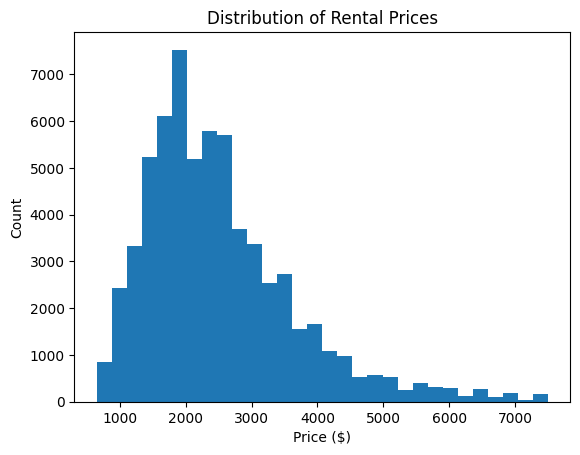

In [37]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

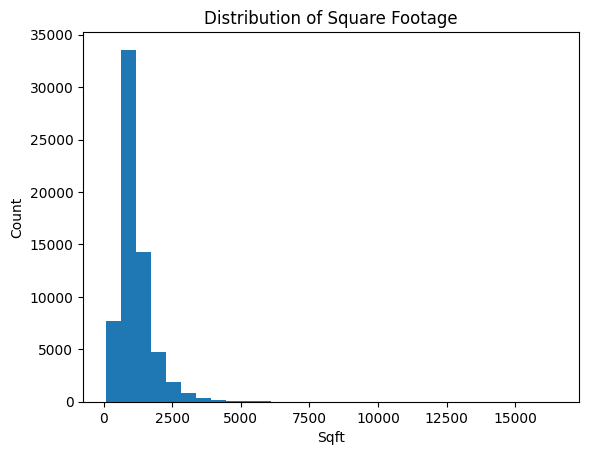

In [38]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


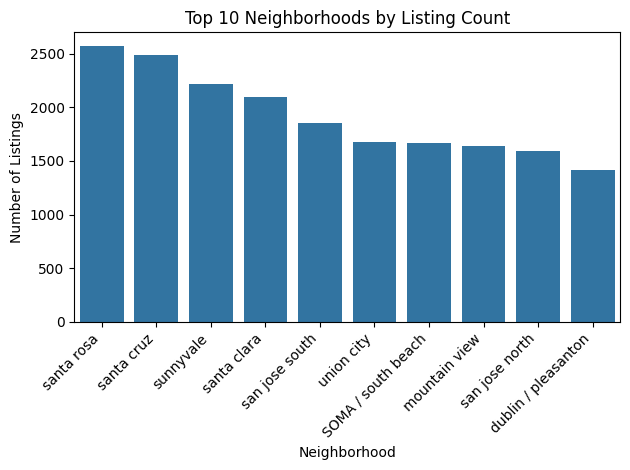

In [39]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

# we have 167 different neighborhoods stored as a categorical variable - lets remove the ones not in the top 10
top_nhoods.index = top_nhoods.index.remove_unused_categories()

# now plot a barplot
sns.barplot(x=top_nhoods.index, y=top_nhoods.values, order = top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

2. After creating the visuals, write 1–2 sentences explaining what you notice in each.


In [ ]:
# Visual 1 🔧


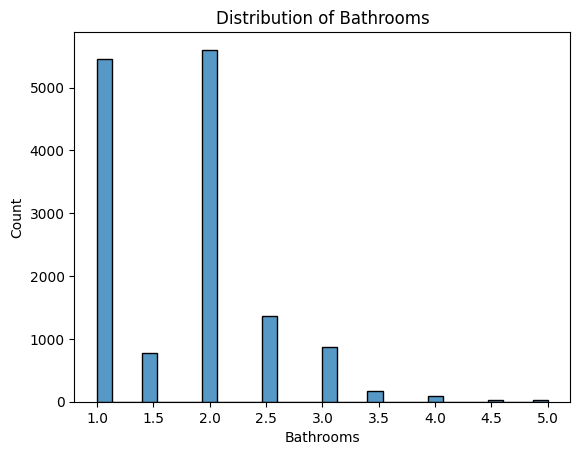

In [40]:
sns.histplot(df['baths'], bins=30)
plt.title("Distribution of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.show()

🔧 Visual 1 comment:

The majority of places to rent in San Fran have either 1 or 2 bathrooms in the residence.

In [ ]:
# Visual 2 🔧

Text(0, 0.5, 'Average Square Footage')

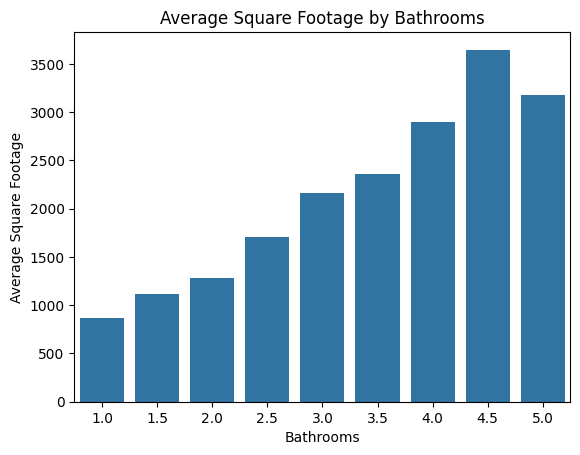

In [42]:
sns.barplot(x=df.groupby('baths')['sqft'].mean().index, y=df.groupby('baths')['sqft'].mean().values)
plt.title("Average Square Footage by Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Average Square Footage")

🔧 Visual 2 comment:

Obivously, the more average SQFT will indicate more bathrooms and vice versa because of needing more bathrooms to fit the household/appartment's needs.

## Part 5: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [43]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.416302,0.360645,0.494467
beds,0.416302,1.000000,0.671183,0.768234
baths,0.360645,0.671183,1.000000,0.673659
sqft,0.494467,0.768234,0.673659,1.000000


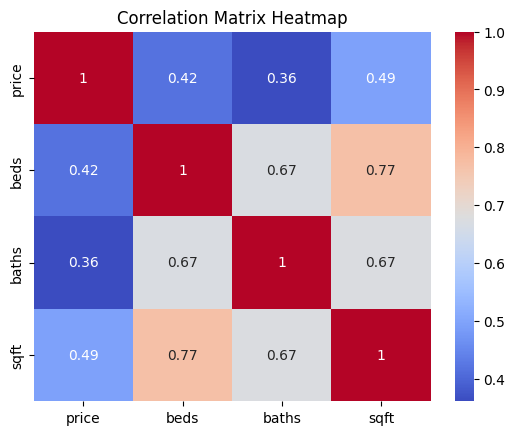

In [44]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

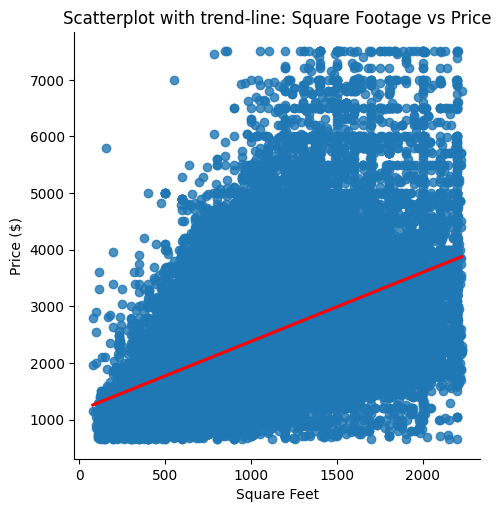

In [45]:
# Scatterplot with a trend line: Square Footage vs Price

# there is a huge outlier in sq footage (see max value is 900,000),
# if you make this plot without removing it, it will not be very useful
# try running it with and without the outliers - to see for yourself

# Remove outliers from sqft using IQR
Q1_sqft = df['sqft'].quantile(0.25)
Q3_sqft = df['sqft'].quantile(0.75)
IQR_sqft = Q3_sqft - Q1_sqft
df = df[((df['sqft'] >= (Q1_sqft - 1.5 * IQR_sqft)) & (df['sqft'] <= (Q3_sqft + 1.5 * IQR_sqft)))]

# now make a scatterplot with a trend line using seaborn's lmplot
sns.lmplot(x='sqft', y='price', data=df, line_kws={"color":"red"})
plt.title("Scatterplot with trend-line: Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

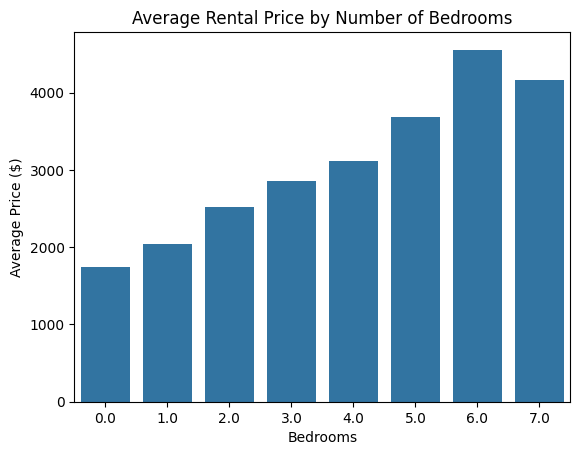

In [46]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.
3. What trends or outliers do you see?

In [ ]:
#1 🔧

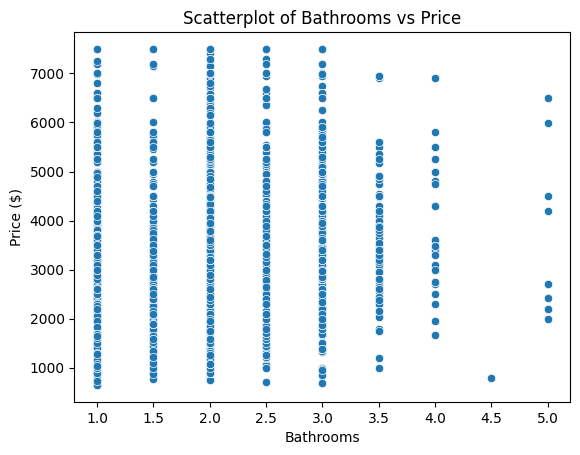

In [49]:
sns.scatterplot(x='baths', y='price', data=df)
plt.title("Scatterplot of Bathrooms vs Price")
plt.xlabel("Bathrooms")
plt.ylabel("Price ($)")
plt.show()

In [ ]:
#2 🔧

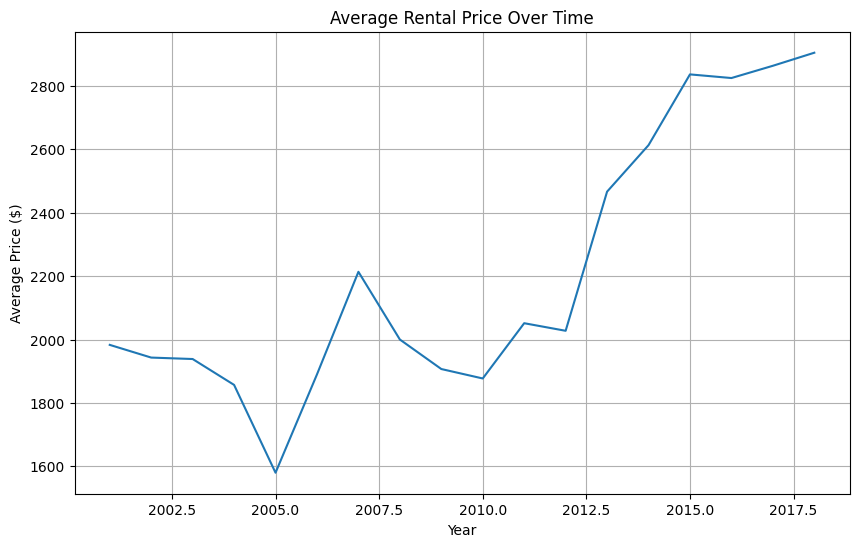

In [50]:
# Group by year and calculate the average price
average_price_by_year = df.groupby('year')['price'].mean()

# Plot the average price over time
plt.figure(figsize=(10, 6))
average_price_by_year.plot()
plt.title('Average Rental Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

🔧 Add comment here:

Starting in 2000 housing prices were steady, then came to a halt in 2005 and dipped, as well as; a dip during the 2009 housing market crash. Furthermore, the housing market has been exploding exponentially since the 2009 crash.

## 🔧  Part 6: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

🔧 Add refections here:


1. The variables that have the most correlation with rental price are: sqft and beds are the most correlated, with bathrooms being close behind on the correlation scale.

2. For about every $300-500 price increase there is an increase of about .5 of a bedroom, correlating into for every ~$800 price increase there will be an increase of about 1 bedroom. Showing a constant increase with price to bedrooms ratio.

3. The year 2017 or the most recent years have the highest rental prices. With lots of movement and increasing prices of everything in society, equates to increases in rental prices.

4. Visualizations to show the analysis of multiple variables comparing at once to see better or new correlation within the data. For example, adding average prices for bathrooms and bedrooms to more clearly see patterns and trends of how valuable another bed or bath is.



In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")
